In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

olivetti_faces = fetch_openml("olivetti_faces", as_frame=False ,parser='auto')
X, y = olivetti_faces.data, olivetti_faces.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train)

In [73]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 40):
    k_means = KMeans(n_clusters=k, n_init='auto')
    k_means.fit(X_train)
    silhouette_scores.append([k, silhouette_score(X_train, k_means.labels_)])

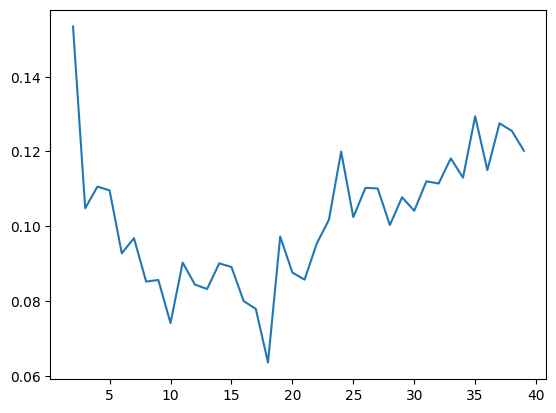

In [74]:
plt.plot([col[0] for col in silhouette_scores], [col[1] for col in silhouette_scores] )
plt.show()

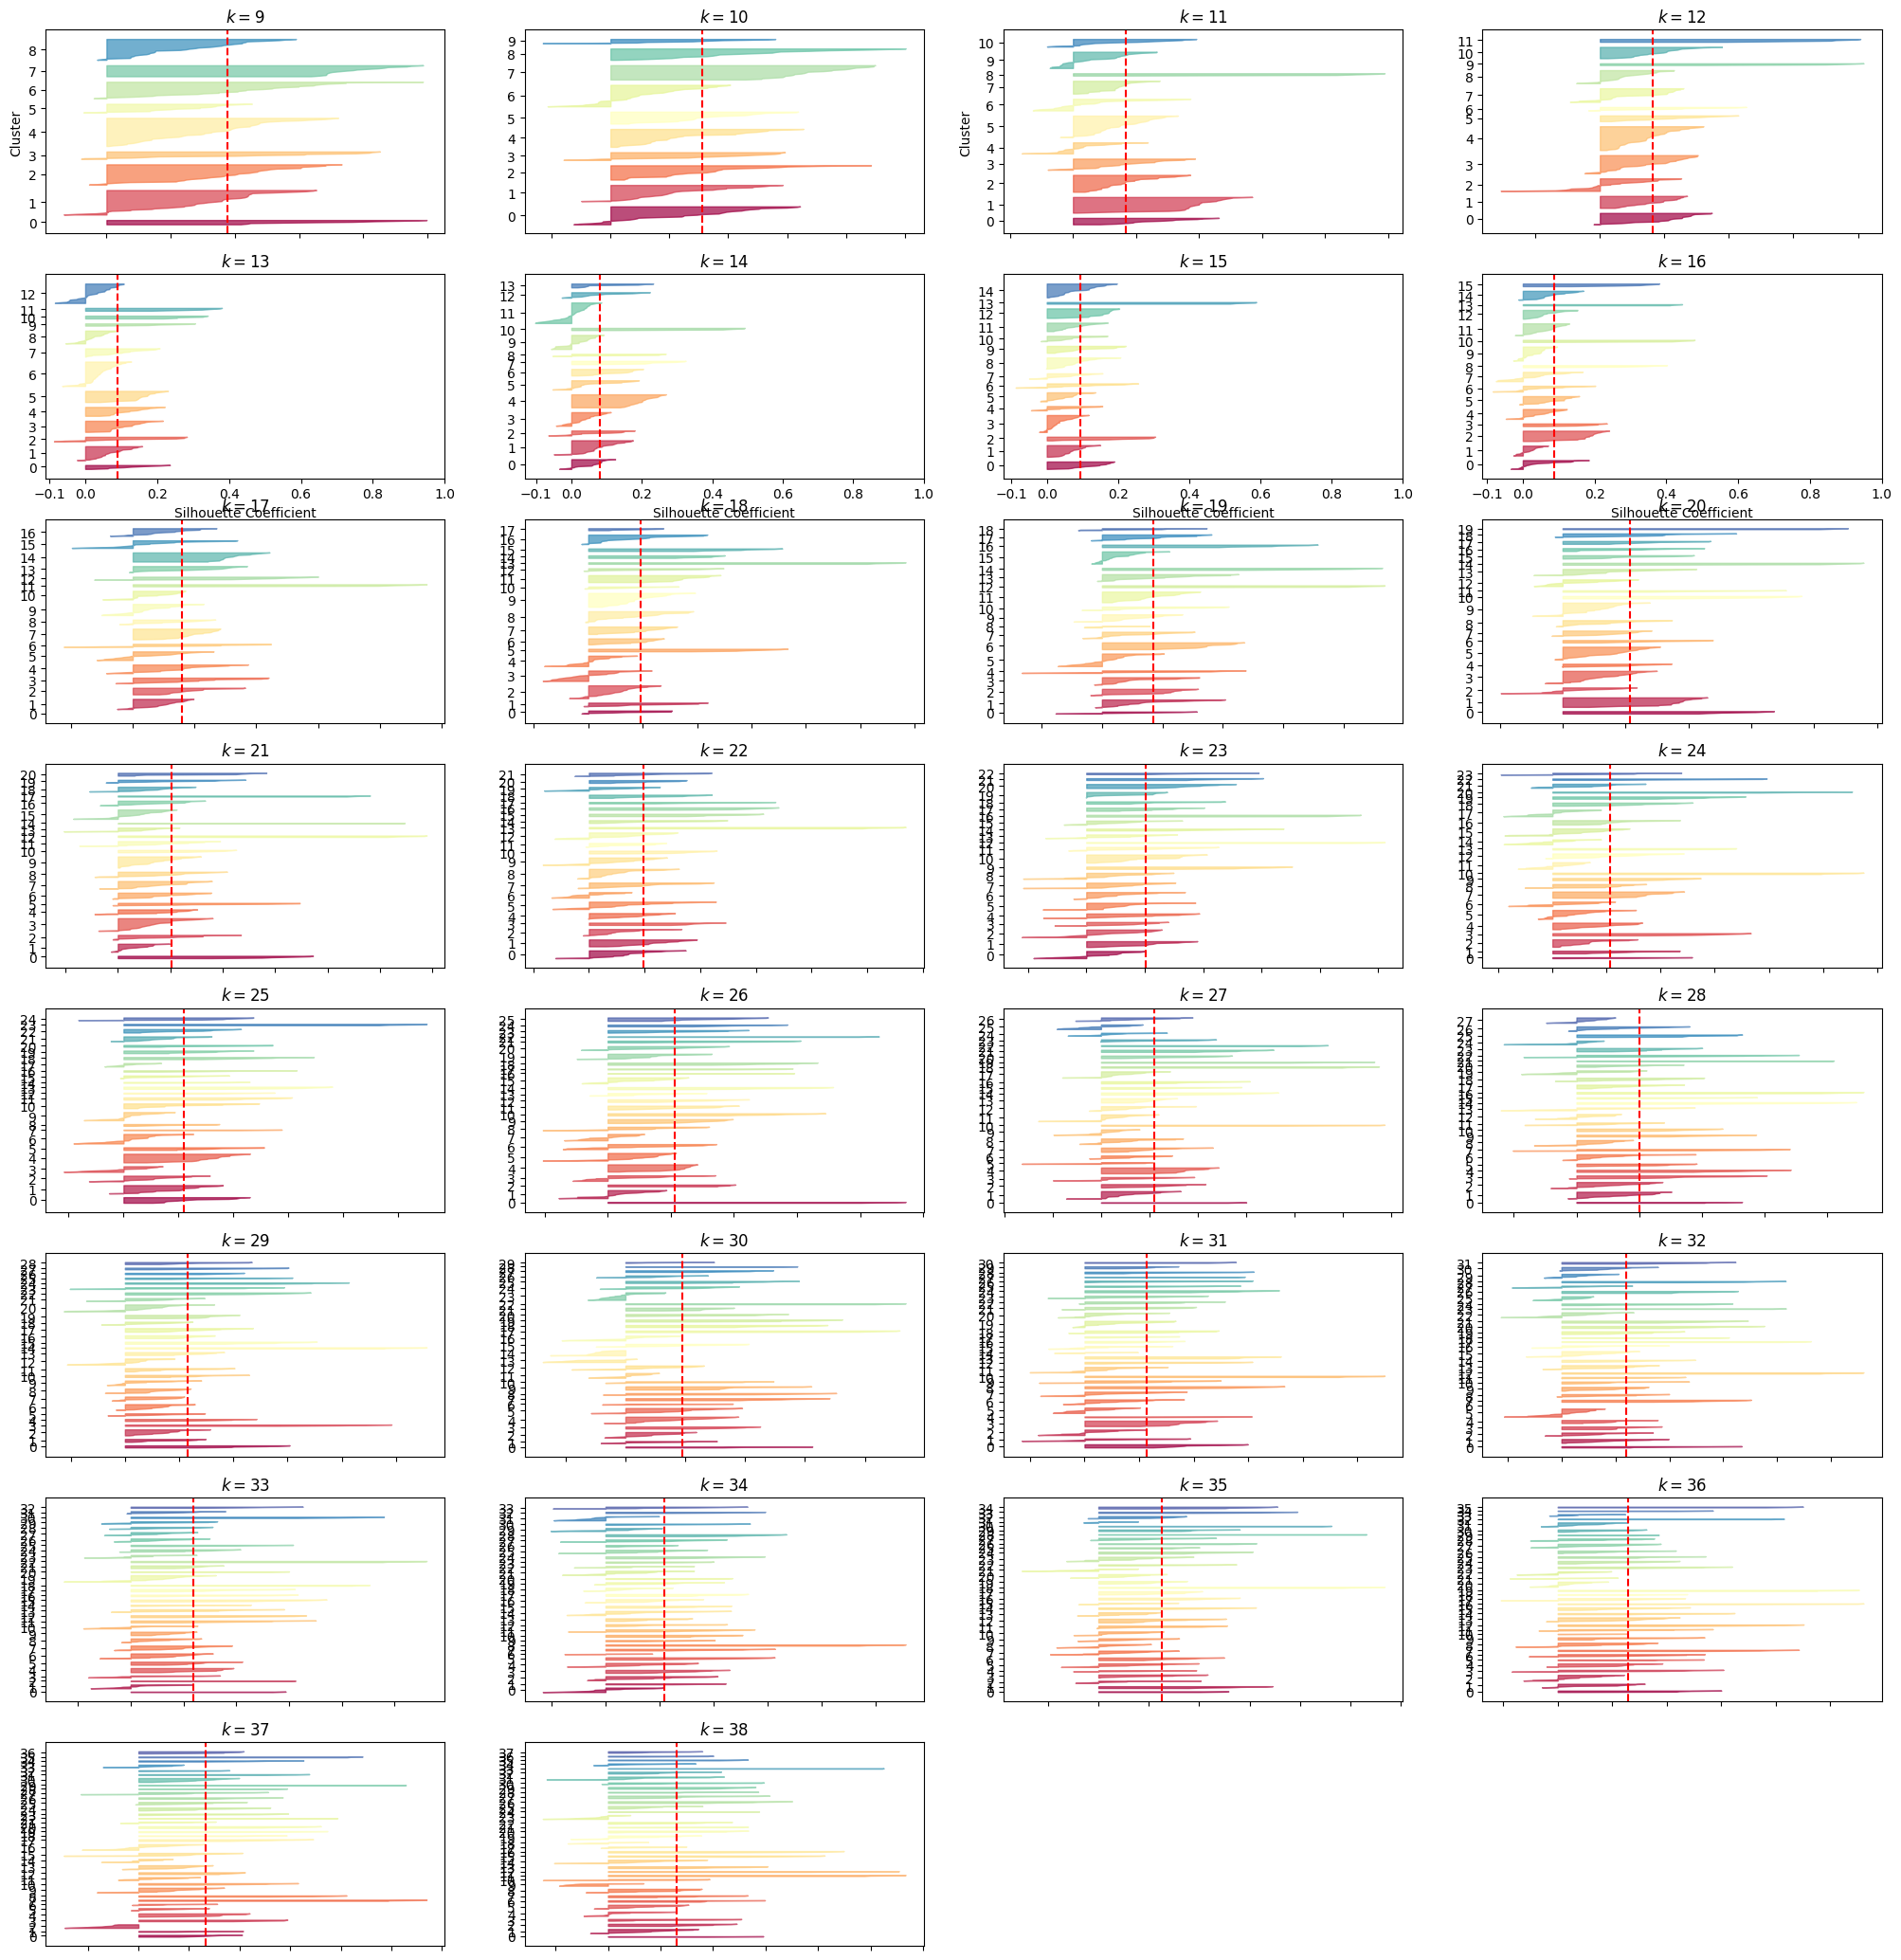

In [81]:
from matplotlib.ticker import FixedFormatter, FixedLocator
from sklearn.metrics import silhouette_samples

k_means_per_k = [KMeans(n_clusters = k, n_init='auto').fit(X_train) for k in range(9, 39)]
silhouette_scores = [silhouette_score(X_train, model.labels_) for model in k_means_per_k]

for k in range(9, 39):
    plt.subplot(30, 4, k-8)
    
    y_pred = k_means_per_k[k-9].labels_
    silhouette_coefficients = silhouette_samples(X_train, y_pred)

    padding = len(X_train) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (9, 11):
        plt.ylabel("Cluster")
    
    if k in (13, 14, 15, 16):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k-9], color="red", linestyle="--")
    plt.title(f"$k={k}$")
    plt.gcf().set_size_inches(25, 100)

plt.show()